In [53]:
import os
os.chdir('/Volumes/General Har/Data_Sets/rpcsv')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ds=pd.read_csv('concrete.csv')
ds

,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [2]:
ds.dtypes

Cement               float64
 Slag                float64
FlyAsh               float64
Water                float64
Superplasticizer     float64
CoarseAggregate      float64
FineAggregate        float64
Age                    int64
ConcreteStrength     float64
dtype: object

In [3]:
ds.isnull().sum()

Cement               0
 Slag                0
FlyAsh               0
Water                0
Superplasticizer     0
CoarseAggregate      0
FineAggregate        0
Age                  0
ConcreteStrength     0
dtype: int64

In [4]:
from scipy import stats
z = np.abs(stats.zscore(ds))

In [5]:
ds.shape

(1030, 9)

In [6]:
ds = ds[(z<3).all(axis = 1)]

In [7]:
ds.shape

(981, 9)

In [8]:
ds.describe()

,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteStrength
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,277.489399,73.106218,56.749745,180.760041,6.194495,974.729256,776.003976,36.448522,35.294220
std,102.594951,85.197793,64.439192,20.139643,5.486470,77.765000,77.651828,36.871075,16.733154
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.300000,0.000000,0.000000,164.900000,0.000000,932.000000,739.000000,7.000000,23.220000
50%,266.000000,22.000000,0.000000,184.000000,6.700000,968.000000,780.000000,28.000000,33.690000
75%,349.000000,144.200000,118.300000,192.000000,10.300000,1038.000000,822.200000,28.000000,45.300000
max,540.000000,316.100000,200.100000,237.000000,23.400000,1145.000000,992.600000,180.000000,82.600000


In [9]:
ds.corr()

,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteStrength
Cement,1.000000,-0.266328,-0.389618,-0.071321,0.030318,-0.092010,-0.237042,0.030073,0.485174
Slag,-0.266328,1.000000,-0.334016,0.105951,0.067628,-0.293014,-0.277048,-0.051423,0.149047
FlyAsh,-0.389618,-0.334016,1.000000,-0.256133,0.430345,-0.027427,0.059940,-0.054422,-0.081538
Water,-0.071321,0.105951,-0.256133,1.000000,-0.642165,-0.202194,-0.400566,0.115496,-0.327835
Superplasticizer,0.030318,0.067628,0.430345,-0.642165,1.000000,-0.239669,0.163481,-0.080760,0.384011
CoarseAggregate,-0.092010,-0.293014,-0.027427,-0.202194,-0.239669,1.000000,-0.187816,0.022298,-0.158351
FineAggregate,-0.237042,-0.277048,0.059940,-0.400566,0.163481,-0.187816,1.000000,-0.036370,-0.162665
Age,0.030073,-0.051423,-0.054422,0.115496,-0.080760,0.022298,-0.036370,1.000000,0.432874
ConcreteStrength,0.485174,0.149047,-0.081538,-0.327835,0.384011,-0.158351,-0.162665,0.432874,1.000000


# Normalizing

In [10]:
import pandas as pd
from sklearn import preprocessing
x=ds.values
scaler=preprocessing.MinMaxScaler()
x_scaled=scaler.fit_transform(x)
ds=pd.DataFrame(x_scaled)
ds

,0,1,2,3,4,5,6,7,8
0,1.000000,0.000000,0.000000,0.348958,0.106838,0.694767,0.205720,0.150838,0.967485
1,1.000000,0.000000,0.000000,0.348958,0.106838,0.738372,0.205720,0.150838,0.741996
2,0.374429,0.360645,0.000000,0.921875,0.000000,0.380814,0.190667,0.497207,0.556871
3,0.634703,0.300538,0.000000,0.921875,0.000000,0.380814,0.000000,0.150838,0.425065
4,0.374429,0.360645,0.000000,0.921875,0.000000,0.380814,0.190667,0.150838,0.542170
...,...,...,...,...,...,...,...,...,...
976,0.398174,0.366972,0.451274,0.501736,0.380342,0.200872,0.437280,0.150838,0.522611
977,0.502740,0.000000,0.577711,0.644097,0.444444,0.049128,0.550426,0.150838,0.359412
978,0.106164,0.441000,0.542729,0.615451,0.260684,0.265698,0.466633,0.150838,0.266226
979,0.130365,0.590636,0.000000,0.467014,0.482906,0.548256,0.488961,0.150838,0.379220


Will test concrete strength in the following ways-


Model 1 - Cement , SuperPlas. , Age

Model 2- Cement, SuperPlas

Model 3- Cement, Age

Model 4 - All Input

In [11]:
x1=ds.iloc[:,[0,4,7]]
x1

,0,4,7
0,1.000000,0.106838,0.150838
1,1.000000,0.106838,0.150838
2,0.374429,0.000000,0.497207
3,0.634703,0.000000,0.150838
4,0.374429,0.000000,0.150838
...,...,...,...
976,0.398174,0.380342,0.150838
977,0.502740,0.444444,0.150838
978,0.106164,0.260684,0.150838
979,0.130365,0.482906,0.150838


In [12]:
x1=ds.iloc[:,[0,4,7]].values

In [13]:
x1

array([[1.        , 0.10683761, 0.15083799],
       [1.        , 0.10683761, 0.15083799],
       [0.37442922, 0.        , 0.4972067 ],
       ...,
       [0.10616438, 0.26068376, 0.15083799],
       [0.1303653 , 0.48290598, 0.15083799],
       [0.36278539, 0.36752137, 0.15083799]])

In [14]:
x1.shape # Model 1 x

(981, 3)

In [15]:
x2=ds.iloc[:,[0,4]]
x2

,0,4
0,1.000000,0.106838
1,1.000000,0.106838
2,0.374429,0.000000
3,0.634703,0.000000
4,0.374429,0.000000
...,...,...
976,0.398174,0.380342
977,0.502740,0.444444
978,0.106164,0.260684
979,0.130365,0.482906


In [16]:
x2=ds.iloc[:,[0,4]].values # Model 2 x

In [17]:
x2.shape

(981, 2)

In [18]:
x3=ds.iloc[:,[0,7]].values #Model 3 x

In [19]:
x3.shape

(981, 2)

In [20]:
x4=ds.iloc[:,0:8]
x4

,0,1,2,3,4,5,6,7
0,1.000000,0.000000,0.000000,0.348958,0.106838,0.694767,0.205720,0.150838
1,1.000000,0.000000,0.000000,0.348958,0.106838,0.738372,0.205720,0.150838
2,0.374429,0.360645,0.000000,0.921875,0.000000,0.380814,0.190667,0.497207
3,0.634703,0.300538,0.000000,0.921875,0.000000,0.380814,0.000000,0.150838
4,0.374429,0.360645,0.000000,0.921875,0.000000,0.380814,0.190667,0.150838
...,...,...,...,...,...,...,...,...
976,0.398174,0.366972,0.451274,0.501736,0.380342,0.200872,0.437280,0.150838
977,0.502740,0.000000,0.577711,0.644097,0.444444,0.049128,0.550426,0.150838
978,0.106164,0.441000,0.542729,0.615451,0.260684,0.265698,0.466633,0.150838
979,0.130365,0.590636,0.000000,0.467014,0.482906,0.548256,0.488961,0.150838


In [21]:
x4=ds.iloc[:,0:8].values

In [22]:
x4.shape

(981, 8)

In [23]:
y=ds.iloc[:,8].values
y

array([0.96748474, 0.74199576, 0.55687056, 0.4250654 , 0.54217018,
       0.46044599, 0.44524729, 0.32004485, 0.49831818, 0.56658777,
       0.63012333, 0.46131805, 0.4762676 , 0.50193098, 0.49221378,
       0.3227856 , 0.07138408, 0.52173913, 0.62028155, 0.4372742 ,
       0.45185001, 0.49071882, 0.34570823, 0.44088701, 0.49707238,
       0.42257381, 0.59960135, 0.63249035, 0.48847639, 0.40799801,
       0.15846518, 0.47875919, 0.29811885, 0.37984303, 0.46655039,
       0.55562477, 0.38358042, 0.58377974, 0.15273452, 0.15335742,
       0.08471409, 0.60570574, 0.38233462, 0.09393298, 0.57767535,
       0.34819983, 0.48000498, 0.8678211 , 0.3995266 , 0.32976205,
       0.38706864, 0.42319671, 0.33225364, 0.44188364, 0.38706864,
       0.32104148, 0.38706864, 0.28491342, 0.48299489, 0.41073876,
       0.32353308, 0.32727046, 0.41073876, 0.27494705, 0.41073876,
       0.46057057, 0.47676592, 0.41073876, 0.27120967, 0.54653046,
       0.50417341, 0.58390432, 0.55400523, 0.54030148, 0.66363

Since everything is quantatative, there is no need to encode anything

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=0) # Model 1

In [26]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [27]:
model=Sequential()

In [28]:
x1_train.shape

(686, 3)

# Model 1 Evaluation-

In [29]:
model.add(Dense(input_dim=3,activation='relu',units=100, kernel_initializer='normal')) #Input Layer

In [30]:
for i in range(2):
    model.add(Dense(activation='relu',units=100, kernel_initializer='normal')) #Hidden Layer

In [31]:
model.add(Dense(activation='linear',units=1,kernel_initializer='normal')) #Output Layer

In [32]:
model.compile(optimizer='adam', loss="mean_absolute_error",metrics=['mean_absolute_error'])

In [33]:
model.fit(x1_train,y_train,epochs=300,batch_size=32)

Epoch 1/300
22/22 [==============================] - 0s 2ms/step - loss: 0.3074 - mean_absolute_error: 0.3074
Epoch 2/300
22/22 [==============================] - 0s 3ms/step - loss: 0.1431 - mean_absolute_error: 0.1431
Epoch 3/300
22/22 [==============================] - 0s 3ms/step - loss: 0.1195 - mean_absolute_error: 0.1195
Epoch 4/300
22/22 [==============================] - 0s 3ms/step - loss: 0.1113 - mean_absolute_error: 0.1113
Epoch 5/300
22/22 [==============================] - 0s 3ms/step - loss: 0.1031 - mean_absolute_error: 0.1031
Epoch 6/300
22/22 [==============================] - 0s 4ms/step - loss: 0.1025 - mean_absolute_error: 0.1025
Epoch 7/300
22/22 [==============================] - 0s 3ms/step - loss: 0.0987 - mean_absolute_error: 0.0987
Epoch 8/300
22/22 [==============================] - 0s 3ms/step - loss: 0.0972 - mean_absolute_error: 0.0972
Epoch 9/300
22/22 [==============================] - 0s 3ms/step - loss: 0.0959 - mean_absolute_error: 0.0959
Epoch 10/3

22/22 [==============================] - 0s 2ms/step - loss: 0.0754 - mean_absolute_error: 0.0754
Epoch 75/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0759 - mean_absolute_error: 0.0759
Epoch 76/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0761 - mean_absolute_error: 0.0761
Epoch 77/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0761 - mean_absolute_error: 0.0761
Epoch 78/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0774 - mean_absolute_error: 0.0774
Epoch 79/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0773 - mean_absolute_error: 0.0773
Epoch 80/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0788 - mean_absolute_error: 0.0788
Epoch 81/300
22/22 [==============================] - 0s 3ms/step - loss: 0.0766 - mean_absolute_error: 0.0766
Epoch 82/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0770 - mean_absolute_error: 0.0770
Epoch 83/300
2

22/22 [==============================] - 0s 2ms/step - loss: 0.0740 - mean_absolute_error: 0.0740
Epoch 148/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0744 - mean_absolute_error: 0.0744
Epoch 149/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0733 - mean_absolute_error: 0.0733
Epoch 150/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0749 - mean_absolute_error: 0.0749
Epoch 151/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0746 - mean_absolute_error: 0.0746
Epoch 152/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0730 - mean_absolute_error: 0.0730
Epoch 153/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0736 - mean_absolute_error: 0.0736
Epoch 154/300
22/22 [==============================] - 0s 3ms/step - loss: 0.0732 - mean_absolute_error: 0.0732
Epoch 155/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0728 - mean_absolute_error: 0.0728
Epoch 

22/22 [==============================] - 0s 2ms/step - loss: 0.0740 - mean_absolute_error: 0.0740
Epoch 221/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0714 - mean_absolute_error: 0.0714
Epoch 222/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0731 - mean_absolute_error: 0.0731
Epoch 223/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0739 - mean_absolute_error: 0.0739
Epoch 224/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0725 - mean_absolute_error: 0.0725
Epoch 225/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0726 - mean_absolute_error: 0.0726
Epoch 226/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0722 - mean_absolute_error: 0.0722
Epoch 227/300
22/22 [==============================] - ETA: 0s - loss: 0.1023 - mean_absolute_error: 0.102 - 0s 2ms/step - loss: 0.0724 - mean_absolute_error: 0.0724
Epoch 228/300
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 0.0706 - mean_absolute_error: 0.0706
Epoch 293/300
22/22 [==============================] - 0s 3ms/step - loss: 0.0714 - mean_absolute_error: 0.0714
Epoch 294/300
22/22 [==============================] - 0s 3ms/step - loss: 0.0733 - mean_absolute_error: 0.0733
Epoch 295/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0726 - mean_absolute_error: 0.0726
Epoch 296/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0703 - mean_absolute_error: 0.0703
Epoch 297/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0703 - mean_absolute_error: 0.0703
Epoch 298/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0707 - mean_absolute_error: 0.0707
Epoch 299/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0699 - mean_absolute_error: 0.0699
Epoch 300/300
22/22 [==============================] - 0s 2ms/step - loss: 0.0716 - mean_absolute_error: 0.0716


In [34]:
from sklearn.metrics import mean_squared_error,r2_score
y_train_prediction = model.predict(x1_train)
y_test_prediction = model.predict(x1_test)


In [35]:
rmse_training = np.sqrt(mean_squared_error(y_train, y_train_prediction))
r2_training = r2_score(y_train, y_train_prediction)
print("training dataset evaluation ( Model 1) :", rmse_training, r2_training)

training dataset evaluation ( Model 1) : 0.09582301853633904 0.7877792951506475


In [36]:
rmse_testing = np.sqrt(mean_squared_error(y_test, y_test_prediction))
r2_testing = r2_score(y_test, y_test_prediction)
print("testing dataset evaluation (Model 1) :", rmse_testing, r2_testing)

testing dataset evaluation (Model 1) : 0.10979250380178884 0.722539785607015


# Model 2 Evaluation -

In [37]:
x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=0) # Model 1

In [38]:
model2=Sequential()

In [39]:
model2.add(Dense(input_dim=2,activation='relu',units=100, kernel_initializer='normal')) #Input Layer
for i in range(2):
    model2.add(Dense(activation='relu',units=100, kernel_initializer='normal')) #Hidden Layer
model2.add(Dense(activation='linear',units=1,kernel_initializer='normal')) #Output Layer

In [40]:
model2.compile(optimizer='adam', loss="mean_absolute_error",metrics=['mean_absolute_error'])
model2.fit(x2_train,y_train,epochs=200,batch_size=32)

Epoch 1/200
22/22 [==============================] - 0s 2ms/step - loss: 0.3265 - mean_absolute_error: 0.3265
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1459 - mean_absolute_error: 0.1459
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1391 - mean_absolute_error: 0.1391
Epoch 4/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1322 - mean_absolute_error: 0.1322
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1312 - mean_absolute_error: 0.1312
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1296 - mean_absolute_error: 0.1296
Epoch 7/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1293 - mean_absolute_error: 0.1293
Epoch 8/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1275 - mean_absolute_error: 0.1275
Epoch 9/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1286 - mean_absolute_error: 0.1286
Epoch 10/2

22/22 [==============================] - 0s 3ms/step - loss: 0.1252 - mean_absolute_error: 0.1252
Epoch 75/200
22/22 [==============================] - 0s 5ms/step - loss: 0.1252 - mean_absolute_error: 0.1252
Epoch 76/200
22/22 [==============================] - 0s 4ms/step - loss: 0.1248 - mean_absolute_error: 0.1248
Epoch 77/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1239 - mean_absolute_error: 0.1239
Epoch 78/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1260 - mean_absolute_error: 0.1260
Epoch 79/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1257 - mean_absolute_error: 0.1257
Epoch 80/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1246 - mean_absolute_error: 0.1246
Epoch 81/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1259 - mean_absolute_error: 0.1259
Epoch 82/200
22/22 [==============================] - 0s 4ms/step - loss: 0.1273 - mean_absolute_error: 0.1273
Epoch 83/200
2

22/22 [==============================] - 0s 3ms/step - loss: 0.1252 - mean_absolute_error: 0.1252
Epoch 148/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1246 - mean_absolute_error: 0.1246
Epoch 149/200
22/22 [==============================] - 0s 5ms/step - loss: 0.1246 - mean_absolute_error: 0.1246
Epoch 150/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1255 - mean_absolute_error: 0.1255
Epoch 151/200
22/22 [==============================] - 0s 4ms/step - loss: 0.1254 - mean_absolute_error: 0.1254
Epoch 152/200
22/22 [==============================] - 0s 4ms/step - loss: 0.1242 - mean_absolute_error: 0.1242
Epoch 153/200
22/22 [==============================] - 0s 4ms/step - loss: 0.1239 - mean_absolute_error: 0.1239
Epoch 154/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1242 - mean_absolute_error: 0.1242
Epoch 155/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1256 - mean_absolute_error: 0.1256
Epoch 

In [41]:
y_train_prediction = model2.predict(x2_train)
y_test_prediction = model2.predict(x2_test)

rmse_training = np.sqrt(mean_squared_error(y_train, y_train_prediction))
r2_training = r2_score(y_train, y_train_prediction)
print("training dataset evaluation (Model 2) :", rmse_training, r2_training)

rmse_testing = np.sqrt(mean_squared_error(y_test, y_test_prediction))
r2_testing = r2_score(y_test, y_test_prediction)
print("testing dataset evaluation ( Model 2) :", rmse_testing, r2_testing)

training dataset evaluation (Model 2) : 0.15512714410995276 0.4438093906734665
testing dataset evaluation ( Model 2) : 0.17547079854813402 0.29129573867152525


# Model 3 Evaluation -

In [42]:
x3_train,x3_test,y_train,y_test=train_test_split(x3,y,test_size=0.3,random_state=0) # Model 1
model3=Sequential()

model3.add(Dense(input_dim=2,activation='relu',units=100, kernel_initializer='normal')) #Input Layer
for i in range(2):
    model3.add(Dense(activation='relu',units=100, kernel_initializer='normal')) #Hidden Layer
model3.add(Dense(activation='linear',units=1,kernel_initializer='normal')) #Output Layer

model3.compile(optimizer='adam', loss="mean_absolute_error",metrics=['mean_absolute_error'])
model3.fit(x3_train,y_train,epochs=200,batch_size=32)

Epoch 1/200
22/22 [==============================] - 0s 2ms/step - loss: 0.3140 - mean_absolute_error: 0.3140
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1473 - mean_absolute_error: 0.1473
Epoch 3/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1364 - mean_absolute_error: 0.1364
Epoch 4/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1299 - mean_absolute_error: 0.1299
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1283 - mean_absolute_error: 0.1283
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1250 - mean_absolute_error: 0.1250
Epoch 7/200
22/22 [==============================] - 0s 4ms/step - loss: 0.1262 - mean_absolute_error: 0.1262
Epoch 8/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1252 - mean_absolute_error: 0.1252
Epoch 9/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1233 - mean_absolute_error: 0.1233
Epoch 10/2

22/22 [==============================] - 0s 2ms/step - loss: 0.1026 - mean_absolute_error: 0.1026
Epoch 75/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1037 - mean_absolute_error: 0.1037
Epoch 76/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1014 - mean_absolute_error: 0.1014
Epoch 77/200
22/22 [==============================] - 0s 4ms/step - loss: 0.1020 - mean_absolute_error: 0.1020
Epoch 78/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1019 - mean_absolute_error: 0.1019
Epoch 79/200
22/22 [==============================] - 0s 4ms/step - loss: 0.1019 - mean_absolute_error: 0.1019
Epoch 80/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1031 - mean_absolute_error: 0.1031
Epoch 81/200
22/22 [==============================] - 0s 4ms/step - loss: 0.1056 - mean_absolute_error: 0.1056
Epoch 82/200
22/22 [==============================] - 0s 6ms/step - loss: 0.1031 - mean_absolute_error: 0.1031
Epoch 83/200
2

22/22 [==============================] - 0s 2ms/step - loss: 0.1016 - mean_absolute_error: 0.1016
Epoch 148/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1022 - mean_absolute_error: 0.1022
Epoch 149/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1046 - mean_absolute_error: 0.1046
Epoch 150/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1035 - mean_absolute_error: 0.1035
Epoch 151/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1013 - mean_absolute_error: 0.1013
Epoch 152/200
22/22 [==============================] - ETA: 0s - loss: 0.1097 - mean_absolute_error: 0.109 - 0s 2ms/step - loss: 0.1051 - mean_absolute_error: 0.1051
Epoch 153/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1019 - mean_absolute_error: 0.1019
Epoch 154/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1012 - mean_absolute_error: 0.1012
Epoch 155/200
22/22 [==============================] - 0s 2ms/st

In [43]:
y_train_prediction = model3.predict(x3_train)
y_test_prediction = model3.predict(x3_test)

rmse_training = np.sqrt(mean_squared_error(y_train, y_train_prediction))
r2_training = r2_score(y_train, y_train_prediction)
print("training dataset evaluation (Model 3) :", rmse_training, r2_training)

rmse_testing = np.sqrt(mean_squared_error(y_test, y_test_prediction))
r2_testing = r2_score(y_test, y_test_prediction)
print("testing dataset evaluation ( Model 3) :", rmse_testing, r2_testing)

training dataset evaluation (Model 3) : 0.13079690357259613 0.6045942475625196
testing dataset evaluation ( Model 3) : 0.1336773875877799 0.5886881342242845


# Model 4 Evaluation -

In [44]:
x4_train,x4_test,y_train,y_test=train_test_split(x4,y,test_size=0.3,random_state=0) # Model 1
model4=Sequential()
model4.add(Dense(input_dim=8,activation='relu',units=150, kernel_initializer='normal')) #Input Layer
for i in range(3):
    model3.add(Dense(activation='relu',units=150, kernel_initializer='normal')) #Hidden Layer
model4.add(Dense(activation='linear',units=1,kernel_initializer='normal')) #Output Layer

model4.compile(optimizer='adam', loss="mean_absolute_error",metrics=['mean_absolute_error'])
model4.fit(x4_train,y_train,epochs=600,batch_size=32)

Epoch 1/600
22/22 [==============================] - 0s 3ms/step - loss: 0.2873 - mean_absolute_error: 0.2873
Epoch 2/600
22/22 [==============================] - 0s 3ms/step - loss: 0.1535 - mean_absolute_error: 0.1535
Epoch 3/600
22/22 [==============================] - 0s 4ms/step - loss: 0.1334 - mean_absolute_error: 0.1334
Epoch 4/600
22/22 [==============================] - 0s 3ms/step - loss: 0.1158 - mean_absolute_error: 0.1158
Epoch 5/600
22/22 [==============================] - 0s 3ms/step - loss: 0.0971 - mean_absolute_error: 0.0971
Epoch 6/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0878 - mean_absolute_error: 0.0878
Epoch 7/600
22/22 [==============================] - 0s 3ms/step - loss: 0.0855 - mean_absolute_error: 0.0855
Epoch 8/600
22/22 [==============================] - 0s 5ms/step - loss: 0.0824 - mean_absolute_error: 0.0824
Epoch 9/600
22/22 [==============================] - 0s 4ms/step - loss: 0.0814 - mean_absolute_error: 0.0814
Epoch 10/6

22/22 [==============================] - 0s 2ms/step - loss: 0.0476 - mean_absolute_error: 0.0476
Epoch 75/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0478 - mean_absolute_error: 0.0478
Epoch 76/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0468 - mean_absolute_error: 0.0468
Epoch 77/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0481 - mean_absolute_error: 0.0481
Epoch 78/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0483 - mean_absolute_error: 0.0483
Epoch 79/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0477 - mean_absolute_error: 0.0477
Epoch 80/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0465 - mean_absolute_error: 0.0465
Epoch 81/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0472 - mean_absolute_error: 0.0472
Epoch 82/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0471 - mean_absolute_error: 0.0471
Epoch 83/600
2

22/22 [==============================] - 0s 2ms/step - loss: 0.0418 - mean_absolute_error: 0.0418
Epoch 148/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0413 - mean_absolute_error: 0.0413
Epoch 149/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0419 - mean_absolute_error: 0.0419
Epoch 150/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0417 - mean_absolute_error: 0.0417
Epoch 151/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0402 - mean_absolute_error: 0.0402
Epoch 152/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0408 - mean_absolute_error: 0.0408
Epoch 153/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0418 - mean_absolute_error: 0.0418
Epoch 154/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0397 - mean_absolute_error: 0.0397
Epoch 155/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0403 - mean_absolute_error: 0.0403
Epoch 

22/22 [==============================] - 0s 2ms/step - loss: 0.0381 - mean_absolute_error: 0.0381
Epoch 221/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0374 - mean_absolute_error: 0.0374
Epoch 222/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0379 - mean_absolute_error: 0.0379
Epoch 223/600
22/22 [==============================] - 0s 4ms/step - loss: 0.0382 - mean_absolute_error: 0.0382
Epoch 224/600
22/22 [==============================] - 0s 6ms/step - loss: 0.0382 - mean_absolute_error: 0.0382
Epoch 225/600
22/22 [==============================] - 0s 4ms/step - loss: 0.0393 - mean_absolute_error: 0.0393
Epoch 226/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0386 - mean_absolute_error: 0.0386
Epoch 227/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0383 - mean_absolute_error: 0.0383
Epoch 228/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0383 - mean_absolute_error: 0.0383
Epoch 

22/22 [==============================] - 0s 1ms/step - loss: 0.0368 - mean_absolute_error: 0.0368
Epoch 294/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0363 - mean_absolute_error: 0.0363
Epoch 295/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0352 - mean_absolute_error: 0.0352
Epoch 296/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0350 - mean_absolute_error: 0.0350
Epoch 297/600
22/22 [==============================] - 0s 3ms/step - loss: 0.0350 - mean_absolute_error: 0.0350
Epoch 298/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0361 - mean_absolute_error: 0.0361
Epoch 299/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0368 - mean_absolute_error: 0.0368
Epoch 300/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0351 - mean_absolute_error: 0.0351
Epoch 301/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0355 - mean_absolute_error: 0.0355
Epoch 

22/22 [==============================] - 0s 1ms/step - loss: 0.0349 - mean_absolute_error: 0.0349
Epoch 367/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0347 - mean_absolute_error: 0.0347
Epoch 368/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0337 - mean_absolute_error: 0.0337
Epoch 369/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0334 - mean_absolute_error: 0.0334
Epoch 370/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0336 - mean_absolute_error: 0.0336
Epoch 371/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0333 - mean_absolute_error: 0.0333
Epoch 372/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0335 - mean_absolute_error: 0.0335
Epoch 373/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0335 - mean_absolute_error: 0.0335
Epoch 374/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0337 - mean_absolute_error: 0.0337
Epoch 

22/22 [==============================] - 0s 1ms/step - loss: 0.0327 - mean_absolute_error: 0.0327
Epoch 440/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0342 - mean_absolute_error: 0.0342
Epoch 441/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0323 - mean_absolute_error: 0.0323
Epoch 442/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0319 - mean_absolute_error: 0.0319
Epoch 443/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0319 - mean_absolute_error: 0.0319
Epoch 444/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0326 - mean_absolute_error: 0.0326
Epoch 445/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0320 - mean_absolute_error: 0.0320
Epoch 446/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0338 - mean_absolute_error: 0.0338
Epoch 447/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0325 - mean_absolute_error: 0.0325
Epoch 

22/22 [==============================] - 0s 1ms/step - loss: 0.0311 - mean_absolute_error: 0.0311
Epoch 513/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0311 - mean_absolute_error: 0.0311
Epoch 514/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0316 - mean_absolute_error: 0.0316
Epoch 515/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0314 - mean_absolute_error: 0.0314
Epoch 516/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0319 - mean_absolute_error: 0.0319
Epoch 517/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0315 - mean_absolute_error: 0.0315
Epoch 518/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0318 - mean_absolute_error: 0.0318
Epoch 519/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0320 - mean_absolute_error: 0.0320
Epoch 520/600
22/22 [==============================] - 0s 1ms/step - loss: 0.0320 - mean_absolute_error: 0.0320
Epoch 

22/22 [==============================] - 0s 2ms/step - loss: 0.0317 - mean_absolute_error: 0.0317
Epoch 586/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0300 - mean_absolute_error: 0.0300
Epoch 587/600
22/22 [==============================] - 0s 3ms/step - loss: 0.0307 - mean_absolute_error: 0.0307
Epoch 588/600
22/22 [==============================] - 0s 3ms/step - loss: 0.0320 - mean_absolute_error: 0.0320
Epoch 589/600
22/22 [==============================] - 0s 3ms/step - loss: 0.0311 - mean_absolute_error: 0.0311
Epoch 590/600
22/22 [==============================] - 0s 3ms/step - loss: 0.0311 - mean_absolute_error: 0.0311
Epoch 591/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0310 - mean_absolute_error: 0.0310
Epoch 592/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0297 - mean_absolute_error: 0.0297
Epoch 593/600
22/22 [==============================] - 0s 2ms/step - loss: 0.0297 - mean_absolute_error: 0.0297
Epoch 

In [45]:
y_train_prediction = model4.predict(x4_train)
y_test_prediction = model4.predict(x4_test)

print(x4_train.shape)
print(x4_test.shape)


rmse_training = np.sqrt(mean_squared_error(y_train, y_train_prediction))
r2_training = r2_score(y_train, y_train_prediction)
print("training dataset evaluation (Model 4) :", rmse_training, r2_training)

rmse_testing = np.sqrt(mean_squared_error(y_test, y_test_prediction))
r2_testing = r2_score(y_test, y_test_prediction)
print("testing dataset evaluation ( Model 4) :", rmse_testing, r2_testing)

(686, 8)
(295, 8)
training dataset evaluation (Model 4) : 0.04840364897024824 0.9458492765652978
testing dataset evaluation ( Model 4) : 0.07615787240645466 0.8664988690766469


# Data Visualizations : 

In [46]:
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected = True)
init_notebook_mode(connected = True)

In [47]:
ds.columns

RangeIndex(start=0, stop=9, step=1)

In [48]:
ds.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
dtype: object

In [49]:
ds

,0,1,2,3,4,5,6,7,8
0,1.000000,0.000000,0.000000,0.348958,0.106838,0.694767,0.205720,0.150838,0.967485
1,1.000000,0.000000,0.000000,0.348958,0.106838,0.738372,0.205720,0.150838,0.741996
2,0.374429,0.360645,0.000000,0.921875,0.000000,0.380814,0.190667,0.497207,0.556871
3,0.634703,0.300538,0.000000,0.921875,0.000000,0.380814,0.000000,0.150838,0.425065
4,0.374429,0.360645,0.000000,0.921875,0.000000,0.380814,0.190667,0.150838,0.542170
...,...,...,...,...,...,...,...,...,...
976,0.398174,0.366972,0.451274,0.501736,0.380342,0.200872,0.437280,0.150838,0.522611
977,0.502740,0.000000,0.577711,0.644097,0.444444,0.049128,0.550426,0.150838,0.359412
978,0.106164,0.441000,0.542729,0.615451,0.260684,0.265698,0.466633,0.150838,0.266226
979,0.130365,0.590636,0.000000,0.467014,0.482906,0.548256,0.488961,0.150838,0.379220


In [50]:
ds.rename(columns={0:'Cement ',4:'Superplasticizer ',7:'Age',8:'ConcreteStrength',1:' Slag ',
                  2:'FlyAsh ',3 :'Water  ',5:'CoarseAggregate  ',6:'FineAggregate '})

,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteStrength
0,1.000000,0.000000,0.000000,0.348958,0.106838,0.694767,0.205720,0.150838,0.967485
1,1.000000,0.000000,0.000000,0.348958,0.106838,0.738372,0.205720,0.150838,0.741996
2,0.374429,0.360645,0.000000,0.921875,0.000000,0.380814,0.190667,0.497207,0.556871
3,0.634703,0.300538,0.000000,0.921875,0.000000,0.380814,0.000000,0.150838,0.425065
4,0.374429,0.360645,0.000000,0.921875,0.000000,0.380814,0.190667,0.150838,0.542170
...,...,...,...,...,...,...,...,...,...
976,0.398174,0.366972,0.451274,0.501736,0.380342,0.200872,0.437280,0.150838,0.522611
977,0.502740,0.000000,0.577711,0.644097,0.444444,0.049128,0.550426,0.150838,0.359412
978,0.106164,0.441000,0.542729,0.615451,0.260684,0.265698,0.466633,0.150838,0.266226
979,0.130365,0.590636,0.000000,0.467014,0.482906,0.548256,0.488961,0.150838,0.379220


In [51]:
ds.columns

RangeIndex(start=0, stop=9, step=1)

Box Plots

In [54]:
ds[['Water  ', 'Superplasticizer ',
    ]].iplot(kind='box')

In [55]:
ds[['CoarseAggregate  ', 'FineAggregate ']].iplot(kind='box')

In [56]:
ds[['Age', 'ConcreteStrength']].iplot(kind='box')

Concrete Strength vs Factors

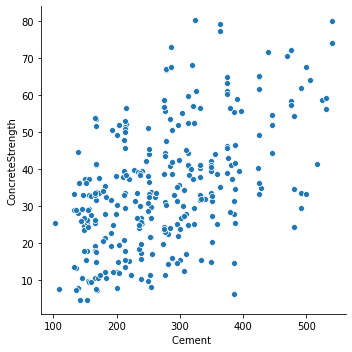

In [57]:
sns.relplot(y='ConcreteStrength',x='Cement ',data=ds.sample(300)) # This type worked passing column as x and y

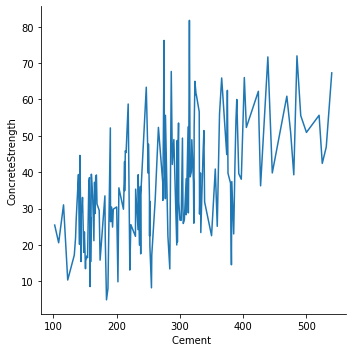

In [58]:
sns.relplot(y='ConcreteStrength',x='Cement ',data=ds.sample(300), kind='line',ci=None) # This type worked passing column as x and y

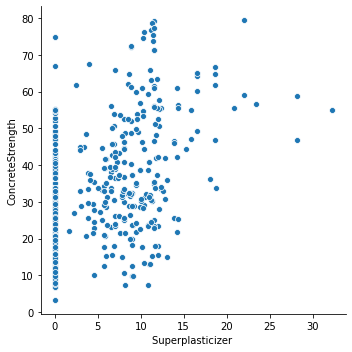

In [59]:
sns.relplot(y='ConcreteStrength',x='Superplasticizer ',data=ds.sample(400))

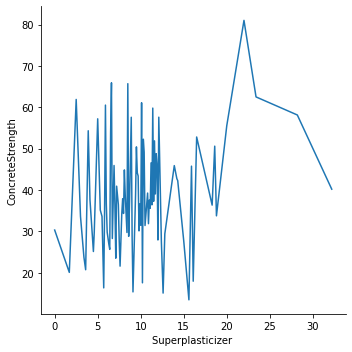

In [60]:
sns.relplot(y='ConcreteStrength',x='Superplasticizer ',data=ds.sample(400),kind='line', ci=None)

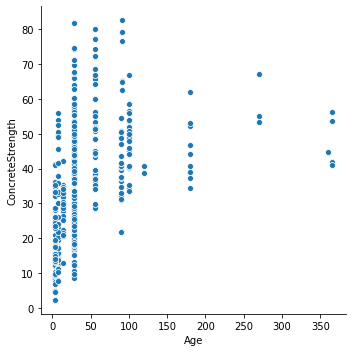

In [61]:
sns.relplot(y='ConcreteStrength',x='Age',data=ds.sample(400))

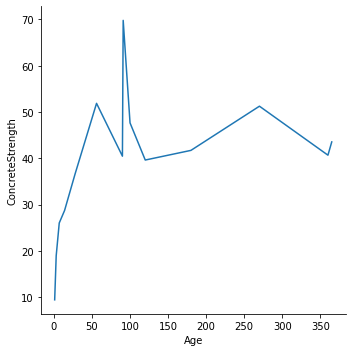

In [62]:
sns.relplot(y='ConcreteStrength',x='Age',data=ds,kind="line", ci=None)

# Bar Graphs

In [63]:
ds.columns

Index(['Cement ', ' Slag ', 'FlyAsh ', 'Water  ', 'Superplasticizer ',
       'CoarseAggregate  ', 'FineAggregate ', 'Age', 'ConcreteStrength'],
      dtype='object')

In [64]:
ds[['Cement ']].iplot(kind='hist', yTitle='Count',xTitle='Cement ')

In [65]:
ds[['Age']].iplot(kind='hist', yTitle='Count',xTitle='Age')

In [66]:
ds[['Superplasticizer ']].iplot(kind='hist', yTitle='Count',xTitle='Superplasticizer')

In [67]:
ds[['ConcreteStrength']].iplot(kind='hist', yTitle='Count',xTitle='Concrete Strength')

Regression Models Views-

In [68]:
pd.Series(ds.columns)

0              Cement 
1                Slag 
2              FlyAsh 
3              Water  
4    Superplasticizer 
5    CoarseAggregate  
6       FineAggregate 
7                  Age
8     ConcreteStrength
dtype: object

In [69]:
x1.shape

(981, 3)

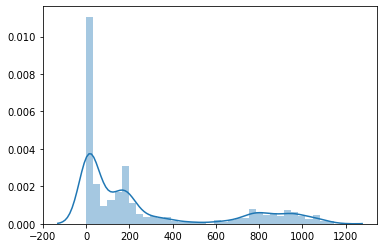

In [70]:
sns.distplot(ds)

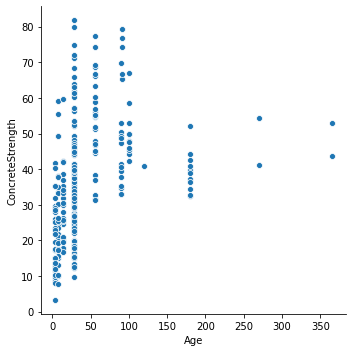

In [75]:
sns.relplot(y='ConcreteStrength',x='Age',data=ds.sample(300)) #Water vs Concrete Strength

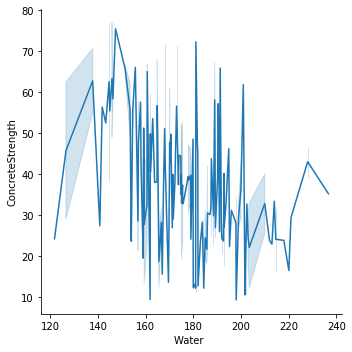

In [74]:
sns.relplot(y='ConcreteStrength',x= 'Water  ',data=ds.sample(300),kind='line')